In [0]:
#!pip install tensorflow==1.6.0
!pip install opencv-python==3.4.0.12
!pip install tqdm==4.19.6
!pip install pandas==0.22.0
!pip install matplotlib==2.2.0
!pip install numpy==1.14.2
!pip install scikit-learn==0.19.1

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 26397 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Please, open the following URL in a web browser: https://accounts.google

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
#Source - https://github.com/MuhammedBuyukkinaci/My-Jupyter-Files/blob/master/Multiclass_CNN.ipynb
#GPU used : Nvidia Tesla K80, on colab
import tensorflow as tf # ML library for graphs


In [0]:
#Importing libraries
import cv2                 # image processing
import numpy as np         # mathematical operations
import os                  # working with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice progress bar for loops

TRAIN_DIR = '/content/drive/ImageClassificationSOP/PlantVillageDataset/Dataset/train1'
TEST_DIR = '/content/drive/ImageClassificationSOP/PlantVillageDataset/Dataset/test1'
IMG_SIZE = 80# our images are 80x80x3

In [0]:
os.getcwd()

'/content'

In [0]:
#Converting the output into one-hot format
def label_img(img):
    word_label = img.split('_')[0]
    if word_label == 'bacterialspot': return [1,0,0,0]     # Tomato Leaf diseases
    elif word_label == 'curlvirus': return [0,1,0,0]
    elif word_label == 'healthy': return [0,0,1,0]
    elif word_label == 'septoriaspot': return [0,0,0,1]

In [0]:
#A function to read training images from folder
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = TRAIN_DIR + '/' + img
        img = cv2.imread(path,1)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            training_data.append([np.array(img),np.array(label)])
        else:
            print("image not loaded")
        #img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        #training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('/content/drive/ImageClassificationSOP/PlantVillageDataset/numpyDataset/train_data_mc.npy', training_data)
    return training_data

In [0]:
#If you are reading images, make the line below uncomment
#train_data = create_train_data()
#If you are reading .npy file, use the line below.
train_data = np.load('/content/drive/ImageClassificationSOP/PlantVillageDataset/numpyDataset/train_data_mc.npy')

In [0]:
#A function to read testing images from folder
#def process_test_data():
 #   testing_data = []
  #     label = label_img(img)
    #    path = TEST_DIR + '/' + img
     #   img = cv2.imread(path,1)
      #  img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
     #   testing_data.append([np.array(img),label])       
    #shuffle(testing_data)
    #np.save('/content/drive/ImageClassificationSOP/PlantVillageDataset/numpyDataset/test_data_mc.npy', testing_data)
    #return testing_data

In [0]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        label = label_img(img)
        path = TEST_DIR + '/' + img
        img = cv2.imread(path,1)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            testing_data.append([np.array(img),np.array(label)])
        else:
            print("image not loaded")
        #img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        #training_data.append([np.array(img),np.array(label)])
    shuffle(testing_data)
    np.save('/content/drive/ImageClassificationSOP/PlantVillageDataset/numpyDataset/test_data_mc.npy', testing_data)
    return testing_data

In [0]:
#If you are reading images, make the line below uncomment.

#test_data = process_test_data()

#If you are reading .npy file, use the line below.
test_data = np.load('/content/drive/ImageClassificationSOP/PlantVillageDataset/numpyDataset/test_data_mc.npy')

In [0]:
#For visualizations
import matplotlib.pyplot as plt

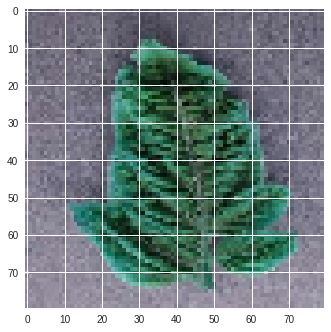

In [0]:
plt.imshow(np.array(train_data[180][0]))

In [0]:
#Splitting into Training and CV datasets
train = train_data[:3600]
cv = train_data[3600:]

In [0]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = np.array([i[1] for i in train])

cv_x = np.array([i[0] for i in cv]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
cv_y = np.array([i[1] for i in cv])


In [0]:
test_x = np.array([i[0] for i in test_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_y = np.array([i[1] for i in test_data])

In [0]:
print(X.shape)

(3600, 80, 80, 3)


In [0]:
print(Y[2],type(Y[2]))


[0 0 0 1] <class 'numpy.ndarray'>


In [0]:
cv_x.shape

(400, 80, 80, 3)

In [0]:
test_x.shape

(800, 80, 80, 3)

In [0]:
#HYPERPARAMETERS
steps = 3600 # number of samples in training set
epochs = 120 #number of epochs
step_size = 32 # 
total_batch = int(steps/step_size)
LR = 0.0001

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [0]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b


In [0]:
print(X[5].shape)

(80, 80, 3)


In [0]:
#Resetting the graph
tf.reset_default_graph()

In [0]:
#Defining placeholders
x = tf.placeholder(tf.float32,shape=[None,80,80,3])
y_true = tf.placeholder(tf.float32,shape=[None,4])

In [0]:
#Defining the graph
with tf.name_scope('Model'):
    convo_1 = convolutional_layer(x,shape=[4,4,3,32])
    convo_1_pooling = max_pool_2by2(convo_1)
    convo_2 = convolutional_layer(convo_1_pooling,shape=[4,4,32,16])
    convo_2_pooling = max_pool_2by2(convo_2)
    convo_3 = convolutional_layer(convo_2_pooling,shape=[4,4,16,8])
    convo_3_pooling = max_pool_2by2(convo_3)
    convo_4 = convolutional_layer(convo_3_pooling,shape=[4,4,8,4])
    convo_4_pooling = max_pool_2by2(convo_4)
    convo_2_flat = tf.reshape(convo_4_pooling,[-1,5*5*4])
    
    full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,80))
    hold_prob1 = tf.placeholder(tf.float32)
    full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob1)
    
    full_layer_two = tf.nn.relu(normal_full_layer(full_one_dropout,40))
    hold_prob2 = tf.placeholder(tf.float32)
    full_two_dropout = tf.nn.dropout(full_layer_two,keep_prob=hold_prob2)
                                     
    full_layer_three = tf.nn.relu(normal_full_layer(full_two_dropout,20))
    hold_prob3 = tf.placeholder(tf.float32)
    full_three_dropout = tf.nn.dropout(full_layer_three,keep_prob=hold_prob3)
    
    full_layer_four = tf.nn.relu(normal_full_layer(full_three_dropout,10))
    hold_prob4 = tf.placeholder(tf.float32)
    full_four_dropout = tf.nn.dropout(full_layer_four,keep_prob=hold_prob4)
    
    y_pred = normal_full_layer(full_four_dropout,4)

In [0]:
#Defining Loss Function
with tf.name_scope('Loss'):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_pred))

In [0]:
#Defining objectve
with tf.name_scope('ADAM'):
    train = tf.train.AdamOptimizer(learning_rate=LR).minimize(cross_entropy)

In [0]:
#Defining Accuracy
with tf.name_scope('Accuracy'):
    matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))

In [0]:
#Starting variables
init = tf.global_variables_initializer()

In [0]:
tf.summary.scalar("loss", cross_entropy)
tf.summary.scalar("accuracy", acc)
merged_summary_op = tf.summary.merge_all()

In [0]:
#Defining empty lists to keep results
acc_list = []
cross_entropy_list = []
acc_train = []

In [0]:
#Creating a Saver object to save results
saver = tf.train.Saver()


In [0]:
%%time
#Changing settings for GPU running.
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.allocator_type = 'BFC'
#Training and saving the result
with tf.Session(config=config) as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter(TRAIN_DIR, graph=tf.get_default_graph())
    for i in range(epochs):
        for j in range(0,steps,step_size):            
            _ , c , summary,d = sess.run([train,cross_entropy,merged_summary_op,acc],feed_dict={x:X[j:j+step_size] , y_true:Y[j:j+step_size] ,hold_prob1:0.5,hold_prob2:0.5,hold_prob3:0.5,hold_prob4:0.5})
            summary_writer.add_summary(summary, i * total_batch + j)
            acc_train.append(d)
            mean_of_cross_entropy = sess.run(cross_entropy,feed_dict={x:cv_x,y_true:cv_y ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0})
            mean_of_acc = sess.run(acc,feed_dict={x:cv_x ,y_true:cv_y ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0})
            cross_entropy_list.append(mean_of_cross_entropy)
            acc_list.append(mean_of_acc)
        print(i,mean_of_cross_entropy,mean_of_acc)
    saver.save(sess, "/content/drive/ImageClassificationSOP/PlantVillageDataset/models/CNN_MC.ckpt")
    print("test accuracy = ",np.mean([sess.run(acc,feed_dict={x:test_x[:230],y_true:test_y[:230] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0}),sess.run(acc,feed_dict={x:test_x[230:460],y_true:test_y[230:460] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0}),sess.run(acc,feed_dict={x:test_x[460:],y_true:test_y[460:] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0})]))   
    print("cross_entropy loss = ",np.mean([sess.run(cross_entropy,feed_dict={x:test_x[:230],y_true:test_y[:230] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0}),sess.run(cross_entropy,feed_dict={x:test_x[230:460],y_true:test_y[230:460] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0}),sess.run(cross_entropy,feed_dict={x:test_x[460:],y_true:test_y[460:] ,hold_prob1:1.0,hold_prob2:1.0,hold_prob3:1.0,hold_prob4:1.0})]))

0 1.3851728 0.245
1 1.3865281 0.24
2 1.3856708 0.245
3 1.3846298 0.2425
4 1.3855596 0.2425
5 1.3866625 0.195
6 1.3850608 0.2475
7 1.3855891 0.24
8 1.3843807 0.235
9 1.3844322 0.22
10 1.3825793 0.2975
11 1.3750721 0.3025
12 1.3462207 0.42
13 1.310064 0.4975
14 1.2694902 0.4875
15 1.1977797 0.4875
16 1.1835814 0.485
17 1.1646744 0.475
18 1.1564149 0.48
19 1.1461616 0.475
20 1.1363652 0.4775
21 1.1318558 0.4875
22 1.1196551 0.4975
23 1.1111599 0.4875
24 1.1017679 0.4825
25 1.1273124 0.49
26 1.1237601 0.4925
27 1.1004658 0.4875
28 1.0549002 0.4925
29 1.0515616 0.51
30 1.0299175 0.4825
31 1.0543789 0.5075
32 1.0014575 0.51
33 0.9553073 0.5
34 0.9538495 0.575
35 0.92349714 0.5675
36 0.8867617 0.5725
37 0.90102464 0.6175
38 0.8768325 0.6025
39 0.84975433 0.64
40 0.85796446 0.65
41 0.87457824 0.63
42 0.8452256 0.625
43 0.87965226 0.69
44 0.8096654 0.6575
45 0.808099 0.685
46 0.85871077 0.695
47 0.8272894 0.6925
48 0.81444955 0.7
49 0.78634125 0.6875
50 0.8107468 0.7175
51 0.7804333 0.7125
52 0

In [0]:
#Importing pandas to plot results
import pandas as pd

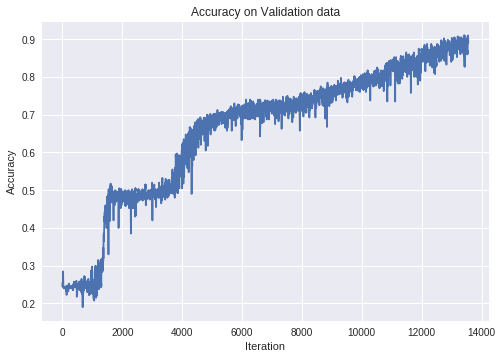

In [0]:
#Plotting the Accuracy
pd.Series(acc_list).plot(kind='line',title='Accuracy on Validation data')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

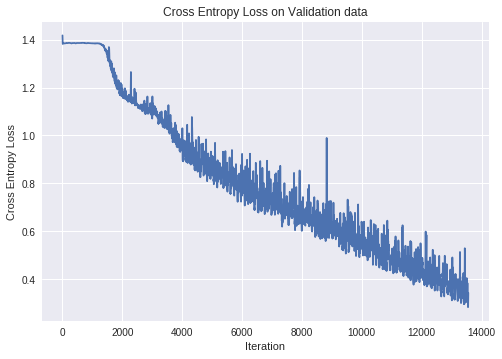

In [0]:
#Plotting the Cross Entropy Loss on CV data
pd.Series(cross_entropy_list).plot(kind='line',title='Cross Entropy Loss on Validation data')
plt.xlabel("Iteration")
plt.ylabel("Cross Entropy Loss")
plt.show()

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
with tf.Session() as session:
    saver.restore(session, "/content/drive/ImageClassificationSOP/PlantVillageDataset/models/CNN_MC.ckpt")
    print("Model restored.") 
    print('Initialized')
    k = session.run([y_pred], feed_dict={x:test_x[0:1] , hold_prob1:1,hold_prob2:1,hold_prob3:1,hold_prob4:1})
    print(k)

INFO:tensorflow:Restoring parameters from /content/drive/ImageClassificationSOP/PlantVillageDataset/models/CNN_MC.ckpt
Model restored.
Initialized
[array([[ -53.0589  , -101.469475,   12.611181,    8.006789]],
      dtype=float32)]


In [0]:
bacterialspot,curlvirus,healthy,septoriaspot = k[0][0][0],k[0][0][1],k[0][0][2],k[0][0][3]

In [0]:
print(bacterialspot,curlvirus,healthy,septoriaspot)


-53.0589 -101.469475 12.611181 8.006789


In [0]:
bacterialspot_exp = np.exp(bacterialspot)
curlvirus_exp = np.exp(curlvirus)
healthy_exp = np.exp(healthy)
septoriaspot_exp = np.exp(septoriaspot)


In [0]:
bacterialspot_prob = bacterialspot_exp / (bacterialspot_exp + curlvirus_exp + healthy_exp + septoriaspot_exp)
curlvirus_prob = curlvirus_exp /(bacterialspot_exp + curlvirus_exp + healthy_exp + septoriaspot_exp)
healthy_prob = healthy_exp /(bacterialspot_exp + curlvirus_exp + healthy_exp + septoriaspot_exp)
septoriaspot_prob = septoriaspot_exp / (bacterialspot_exp + curlvirus_exp + healthy_exp + septoriaspot_exp)

In [0]:
print("bacterialspot_prob %s, curlvirus_prob %s healthy prob %s septoriaspot_prob %s" %(round(bacterialspot_prob,3) ,round(curlvirus_prob,3) ,round(healthy_prob,3),round(septoriaspot_prob,3)))

bacterialspot_prob 0.0, curlvirus_prob 0.0 healthy prob 0.99 septoriaspot_prob 0.01


Text(0.5,1,'bacterialspot_prob 0.0, curlvirus_prob 0.0 healthy prob 0.99 septoriaspot_prob 0.01')

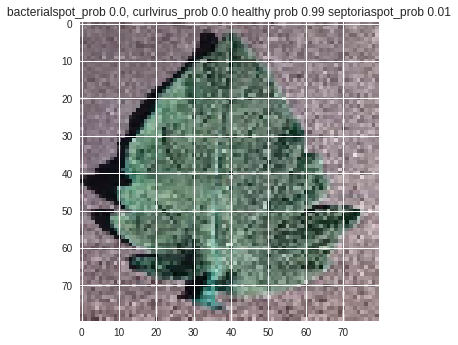

In [0]:
# A healthy leaf
plt.imshow(np.array(test_x[0]))
plt.title("bacterialspot_prob %s, curlvirus_prob %s healthy prob %s septoriaspot_prob %s" %(round(bacterialspot_prob,3) ,round(curlvirus_prob,3) ,round(healthy_prob,3),round(septoriaspot_prob,3)))

In [0]:
with tf.Session() as session:
    saver.restore(session, "/content/drive/ImageClassificationSOP/models/CNN_MC.ckpt")
    print("Model restored.") 
    print('Initialized')
    k = session.run([y_pred], feed_dict={x:test_x[0:64] , hold_prob1:1,hold_prob2:1,hold_prob3:1,hold_prob4:1})

INFO:tensorflow:Restoring parameters from /content/drive/ImageClassificationSOP/models/CNN_MC.ckpt
Model restored.
Initialized


In [0]:
np.array(k).shape

(1, 64, 4)

In [0]:
#Reshaping k
k = np.array(k).reshape(64,4)

In [0]:
k[0]

array([ 0.48035038,  0.4078974 ,  0.39979038, -0.99178994], dtype=float32)

In [0]:
pred_labels = []

In [0]:
for i in range(64):
    r = np.round(np.array(np.exp(k[i])/sum(np.exp(k[i]))),3).argmax()
    if r ==0 : pred_labels.append("bacterialspot")
    elif r ==1: pred_labels.append("curlvirus")
    elif r ==2: pred_labels.append("healthy")
    elif r ==3: pred_labels.append("septoriaspot")


In [0]:
#Multiple images parameters
w=80
h=80
columns = 8
rows = 8

In [0]:
images = test_x[:64]

In [0]:
images.shape

(64, 80, 80, 3)

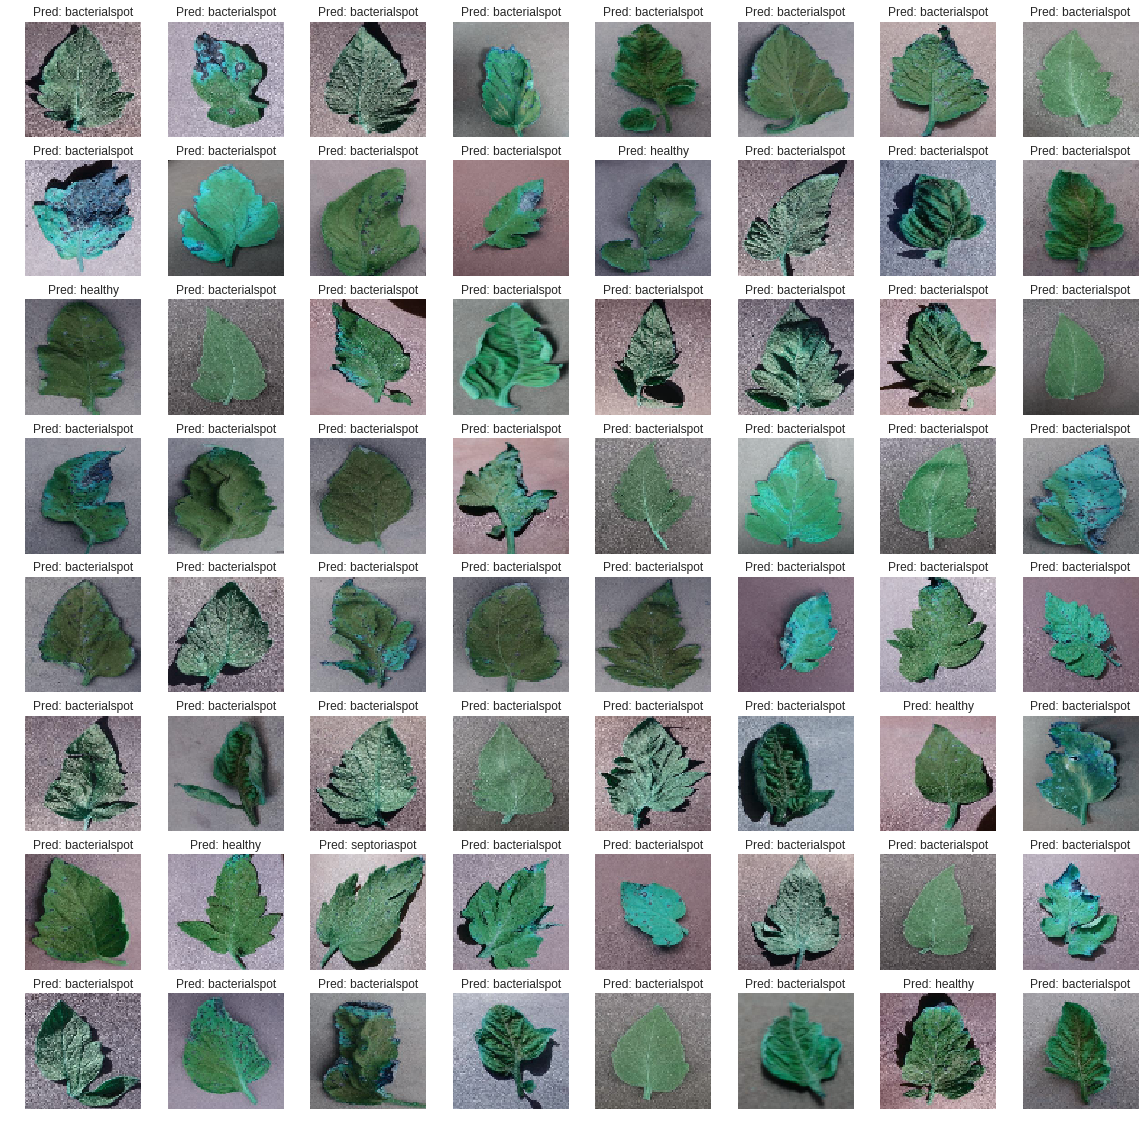

In [0]:
fig = plt.figure(figsize=(20, 20))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([80, 80, 3])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img)
    plt.title("Pred: " + pred_labels[m-1])
    plt.axis('off')
plt.show()